In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling

In [2]:
df = pd.read_csv('Dataset/Train.csv')
df_test = pd.read_csv('Dataset/Test.csv')

In [3]:
df

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257
...,...,...,...,...,...,...,...,...,...
9793,IT_95425,2010-06-08,20,255,0,2,30.4,124,604
9794,IT_95456,2010-06-08,9,60,1,3,1480.0,225,1461
9795,IT_95457,2010-06-08,21,37,1,2,24.4,4721,6637
9796,IT_95472,2010-06-08,21,469,0,0,2.3,5082,6997


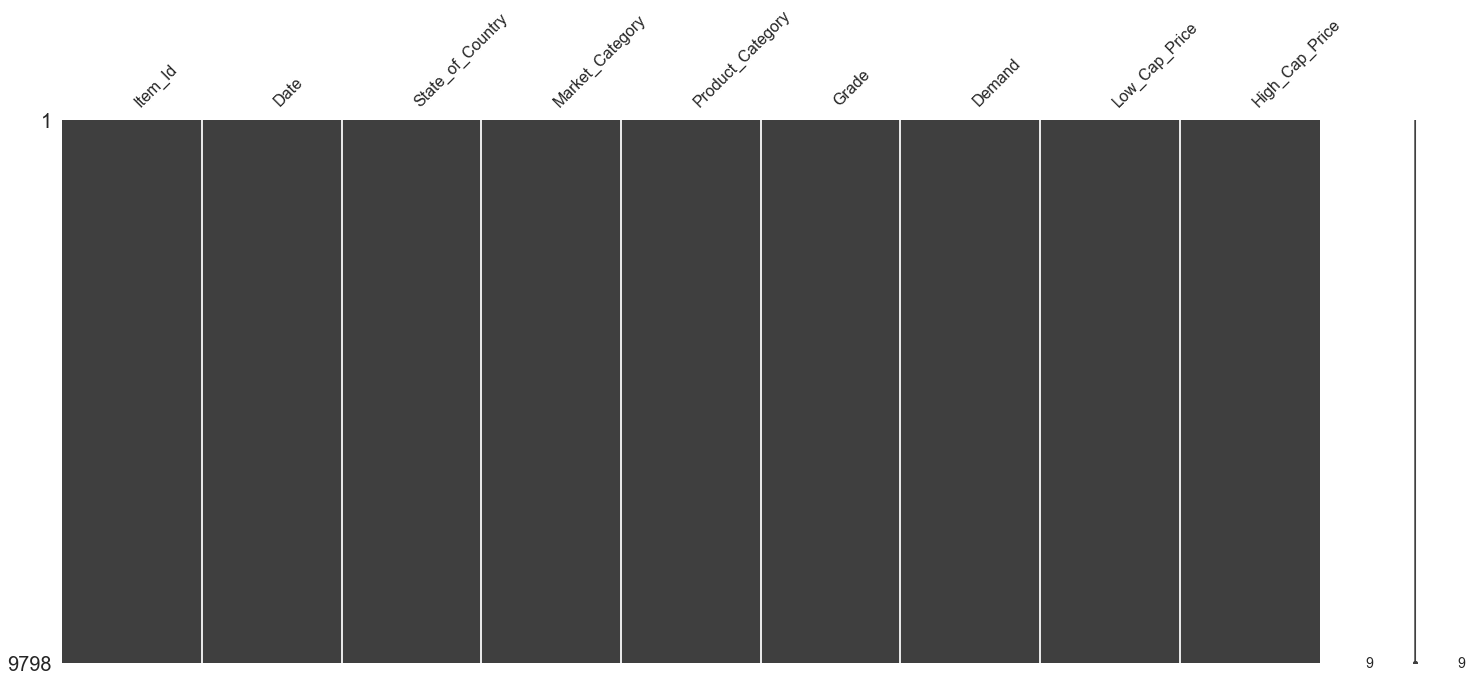

In [4]:
msno.matrix(df)

In [5]:
df.dtypes

Item_Id              object
Date                 object
State_of_Country      int64
Market_Category       int64
Product_Category      int64
Grade                 int64
Demand              float64
Low_Cap_Price         int64
High_Cap_Price        int64
dtype: object

In [6]:
df.drop(['Item_Id'], axis= 1, inplace=True)
df_test.drop(['Item_Id'], axis= 1, inplace=True)

In [7]:
df['Year'] = pd.to_datetime(df.Date).dt.year
df_test['Year'] = pd.to_datetime(df_test.Date).dt.year

In [8]:
df.drop(['Date'], axis= 1, inplace=True)
df_test.drop(['Date'], axis= 1, inplace=True)

In [9]:
df.dtypes

State_of_Country      int64
Market_Category       int64
Product_Category      int64
Grade                 int64
Demand              float64
Low_Cap_Price         int64
High_Cap_Price        int64
Year                  int64
dtype: object

In [10]:
df.State_of_Country = df.State_of_Country.astype('category')
df.Market_Category = df.Market_Category.astype('category')
df.Product_Category = df.Product_Category.astype('category')

df_test.State_of_Country = df_test.State_of_Country.astype('category')
df_test.Market_Category = df_test.Market_Category.astype('category')
df_test.Product_Category = df_test.Product_Category.astype('category')

In [11]:
profile = df.profile_report(title='Profile')
profile.to_file(output_file='ProfileReport.html')

In [24]:
top_mktcat = df.Market_Category.value_counts()[:50]

In [25]:
df['Market_Category_Updated'] = df['Market_Category'].apply(lambda x: x if x in top_mktcat else 'others')
df_test['Market_Category_Updated'] = df_test['Market_Category'].apply(lambda x: x if x in top_mktcat else 'others')

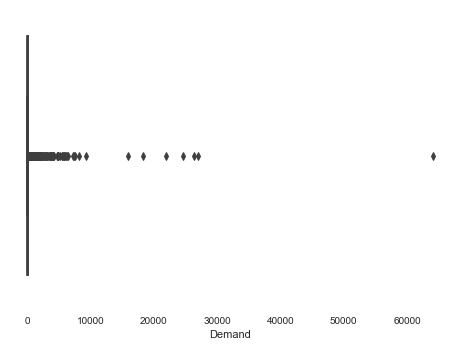

In [28]:
sns.boxplot(x = df.Demand)

In [36]:
df[df.Demand > 1000]

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Year,Market_Category_Updated
161,18,23,10,2,1319.0,1609,6320,2007,23
279,18,23,11,2,1652.8,5843,12123,2007,23
380,8,35,16,2,1022.6,1072,3774,2007,others
480,18,23,16,2,1112.5,1109,3403,2007,23
1348,21,65,0,2,1006.4,1323,1985,2007,65
...,...,...,...,...,...,...,...,...,...
9562,18,23,10,2,4891.0,4837,12507,2010,23
9564,3,423,0,0,1734.6,3738,9292,2010,423
9570,18,23,10,2,5642.8,1515,9613,2010,23
9689,9,60,1,3,1365.2,283,2076,2010,others


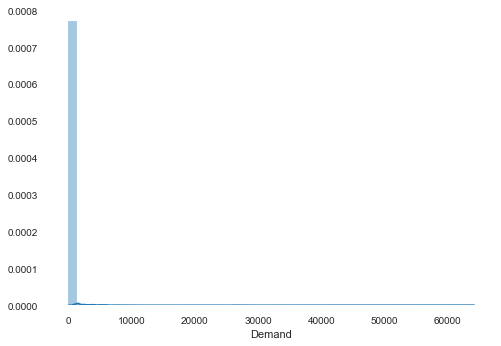

In [39]:
sns.distplot(df.Demand)

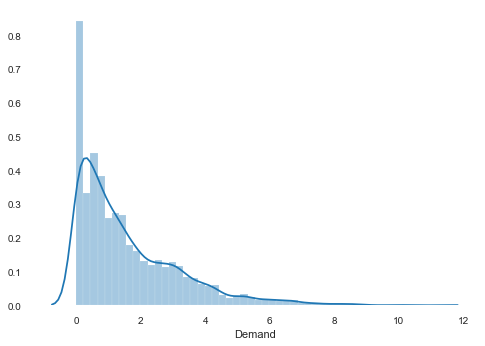

In [43]:
sns.distplot(np.log(df.Demand+1))